# London Crime Rates Project
Based on data obtained from the [London Datastore](https://data.london.gov.uk/), we will explore crime rates in London and any possible relationships between these and other datasets: a dataset concerning active children in London, and another concerning economic inactivity. Technically, the main focus will be on data cleaning and aggregation tasks, as well as data visualisation at a later stage.

## Setting Up The Environment
We first need to set up our environment by importing the necessary packages, running Jupyter magic and importing our data.

In [365]:
# Import packages and Jupyter magic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [366]:
# Import the datasets
data_files = ["crime_rates.csv",
              "active_children.csv",
              "economic_inactivity.csv"]
data = {}

for f in data_files:
    d = pd.read_csv(f)
    data[f.replace(".csv","")] = d

## Data Exploration
Our datasets have now been read into 3 Pandas DataFrames. Let's start exploring them. Specifically, we want to uncover potential missing data issues, as well as figure out how we can merge the datasets.

### Crime Rates

In [367]:
# Display the first rows of crime_rates
data["crime_rates"].head()

,Ward,Old Ward,Borough,WardName,1 Total;2001/02,1 Total;2002/03,1 Total;2003/04,1 Total;2004/05,1 Total;2005/06,1 Total;2006/07,...,Population;2004,Population;2005,Population;2006,Population;2007,Population;2008,Population;2009,Population;2010,Population;2011,Population;2012,Population;2013
0,E05000026,1,Barking and Dagenham,Abbey,277.912739,302.847282,278.966301,299.505182,247.543844,255.496245,...,10711.0,10891.0,11053.0,11275.0,11600.0,12050.0,12528.0,12850.0,13300.0,13747
1,E05000027,2,Barking and Dagenham,Alibon,79.376934,83.732822,86.313325,81.032285,89.708369,96.787783,...,9416.0,9464.0,9495.0,9576.0,9741.0,10007.0,10288.0,10450.0,10400.0,10477
2,E05000028,3,Barking and Dagenham,Becontree,86.014047,89.423077,105.458073,106.451040,111.706402,109.862447,...,11254.0,11199.0,11123.0,11104.0,11180.0,11365.0,11561.0,11600.0,11900.0,12102
3,E05000029,4,Barking and Dagenham,Chadwell Heath,118.192476,132.956002,156.547810,156.675603,152.923538,137.868238,...,9325.0,9338.0,9335.0,9380.0,9506.0,9729.0,9965.0,10100.0,10150.0,10220
4,E05000030,5,Barking and Dagenham,Eastbrook,74.739737,85.990720,77.366173,76.347305,90.690931,92.341664,...,10020.0,10001.0,9963.0,9976.0,10075.0,10275.0,10486.0,10550.0,10650.0,10650


Each row in the crime_rates dataset corresponds to a ward in the Greater London area. Each ward belongs to a borough. There are 32 boroughs in total, and 683 wards in Greater London (the DataFrame contains 684 rows, one of which is the total for the Greater London area). Each ward is identified by a unique, 9-character [GSS code](https://en.wikipedia.org/wiki/ONS_coding_system) (e.g. E05000027). E05 means that the code is at the ward level.

There are 157 columns, covering the years 2001-02 to 2014-15.

In [368]:
# Display the type of each column
data["crime_rates"].dtypes

Ward                                       object
Old Ward                                   object
Borough                                    object
WardName                                   object
1  Total;2001/02                          float64
1  Total;2002/03                          float64
1  Total;2003/04                          float64
1  Total;2004/05                          float64
1  Total;2005/06                          float64
1  Total;2006/07                          float64
1  Total;2007/08                          float64
1  Total;2008/09                          float64
1  Total;2009/10                          float64
1  Total;2010/11                          float64
1  Total;2011/12                          float64
1  Total;2012/13                          float64
1  Total;2013/14                          float64
1  Total;2014/15                          float64
2  Violence Against The Person;2001/02    float64
2  Violence Against The Person;2002/03    float64


The data types seems right; we should check this once we're condensed the dataset down to the columns we'll be working with.

In [369]:
# Display summary statistics of the data
data["crime_rates"].describe()

,1 Total;2001/02,1 Total;2002/03,1 Total;2003/04,1 Total;2004/05,1 Total;2005/06,1 Total;2006/07,1 Total;2007/08,1 Total;2008/09,1 Total;2009/10,1 Total;2010/11,...,Population;2004,Population;2005,Population;2006,Population;2007,Population;2008,Population;2009,Population;2010,Population;2011,Population;2012,Population;2013
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,...,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.840000e+02
mean,132.406603,134.930951,130.863144,126.461593,118.199756,114.840487,108.958979,105.111808,101.432451,99.848374,...,2.412381e+04,2.444543e+04,2.463315e+04,2.486292e+04,2.517222e+04,2.556041e+04,2.593086e+04,2.624224e+04,2.655544e+04,2.565972e+04
std,152.872864,153.939945,134.024901,133.368497,119.303636,110.721148,112.168787,104.541240,105.251733,103.364133,...,3.012277e+05,3.052377e+05,3.075780e+05,3.104497e+05,3.142998e+05,3.191444e+05,3.237734e+05,3.276597e+05,3.315700e+05,3.222125e+05
min,31.894330,30.636031,32.551540,33.933633,36.999206,31.701985,29.819130,32.360097,28.290481,27.120600,...,4.737000e+03,4.778000e+03,4.831000e+03,4.883000e+03,4.948000e+03,5.008000e+03,5.066000e+03,5.150000e+03,5.150000e+03,5.267000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.134100e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.325950e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.527075e+04
max,3003.592384,3046.503414,2615.393465,2585.644007,2264.933087,2078.275606,2095.580571,1922.824639,1925.434218,1872.340426,...,7.542600e+06,7.643000e+06,7.701600e+06,7.773500e+06,7.869900e+06,7.991200e+06,8.107100e+06,8.204400e+06,8.302300e+06,8.439989e+06


There doesn't seem to be any missing values; not sure where those NaN come from.

### Economic Inactivity

In [370]:
# Display the first rows
data["economic_inactivity"].head()

,Code,Area,Economically Inactive; Jan 2004-Dec 2004,Working age; Jan 2004-Dec 2004,percent; Jan 2004-Dec 2004,confidence; Jan 2004-Dec 2004,Economically Inactive; Jan 2005-Dec 2005,Working age; Jan 2005-Dec 2005,percent; Jan 2005-Dec 2005,confidence; Jan 2005-Dec 2005,...,percent; Jan 2012-Dec 2012,confidence; Jan 2012-Dec 2012,Economically Inactive; Jan 2013-Dec 2013,Working age; Jan 2013-Dec 2013,percent; Jan 2013-Dec 2013,confidence; Jan 2013-Dec 2013,Economically Inactive; Oct 2013-Sep 2014,Working age; Oct 2013-Sep 2014,percent; Oct 2013-Sep 2014,confidence; Oct 2013-Sep 2014
0,E09000001,City of London,!,"4,800",!,!,"2,000","8,900",22.3,*,...,!,!,!,"2,300",!,!,!,"2,200",!,!
1,E09000002,Barking and Dagenham,"33,600","105,600",31.8,3.9,"32,600","105,000",31.0,3.8,...,27.7,3.6,"30,700","121,200",25.3,3.6,"34,900","122,700",28.5,3.7
2,E09000003,Barnet,"51,800","209,800",24.7,3.6,"54,900","214,700",25.6,4.0,...,25.9,3.8,"56,400","240,700",23.4,3.8,"61,800","243,300",25.4,3.8
3,E09000004,Bexley,"29,300","139,200",21.0,3.6,"28,900","140,600",20.5,3.5,...,21.2,3.7,"29,300","145,300",20.2,3.8,"31,200","147,100",21.2,3.8
4,E09000005,Brent,"54,600","181,100",30.1,3.6,"52,400","184,600",28.4,3.8,...,25.2,3.4,"53,800","217,300",24.8,3.1,"58,400","217,800",26.8,3.1


This dataset contains information at a less granular level and on areas outside London. The areas of interest to us are those whose code begins with "E09", meaning the area is a borough of London.

Here too, the columns cover several years (2004 to 2014).

In [371]:
# Display the column types
data["economic_inactivity"].dtypes

Code                                         object
Area                                         object
Economically Inactive; Jan 2004-Dec 2004     object
Working age; Jan 2004-Dec 2004               object
percent; Jan 2004-Dec 2004                   object
confidence; Jan 2004-Dec 2004                object
Economically Inactive; Jan 2005-Dec 2005     object
Working age; Jan 2005-Dec 2005               object
percent; Jan 2005-Dec 2005                  float64
confidence; Jan 2005-Dec 2005                object
Economically Inactive; Jan 2006-Dec 2006     object
Working age; Jan 2006-Dec 2006               object
percent; Jan 2006-Dec 2006                  float64
confidence; Jan 2006-Dec 2006                object
Economically Inactive; Jan 2007-Dec 2007     object
Working age; Jan 2007-Dec 2007               object
percent; Jan 2007-Dec 2007                   object
confidence; Jan 2007-Dec 2007                object
Economically Inactive; Jan 2008-Dec 2008     object
Working age;

Most columns are objects; this is probably due to missing information. We'll have to solve this before we can use the data for analysis.

### Active Children

In [372]:
data["active_children"].head()

,Code,Area,Active children-2007-08,All children-2007-08,Percent active-2007-08,Lower 95perc CI-2007-08,Upper 95perc CI-2007-08,Lower 99.8perc CI-2007-08,Upper 99.8perc CI-2007-08
0,00AB,Barking and Dagenham,23312,25329,92.0,91.7,92.4,91.5,92.5
1,00AC,Barnet,32173,36657,87.8,87.4,88.1,87.2,88.3
2,00AD,Bexley,30481,34416,88.6,88.2,88.9,88.0,89.1
3,00AE,Brent,28462,33133,85.9,85.5,86.3,85.3,86.5
4,00AF,Bromley,32812,36579,89.7,89.4,90.0,89.2,90.2


The codes in active_children are ONS codes; this system was replaced in 2011 by the GSS coding. The codes beginning with "00" refer to London boroughs. As all datasets don't use the same coding system, we'll have to find another column to merge them on.

In [373]:
data["active_children"].dtypes

Code                          object
Area                          object
Active children-2007-08        int64
All children-2007-08           int64
Percent active-2007-08       float64
Lower 95perc CI-2007-08      float64
Upper 95perc CI-2007-08      float64
Lower 99.8perc CI-2007-08    float64
Upper 99.8perc CI-2007-08    float64
dtype: object

In [374]:
data["active_children"].describe()

,Active children-2007-08,All children-2007-08,Percent active-2007-08,Lower 95perc CI-2007-08,Upper 95perc CI-2007-08,Lower 99.8perc CI-2007-08,Upper 99.8perc CI-2007-08
count,4.200000e+01,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2.863768e+05,3.183689e+05,89.330952,89.014286,89.635714,88.833333,89.811905
std,8.840502e+05,9.820936e+05,3.046749,3.100242,3.010860,3.139416,2.979868
min,7.939000e+03,8.569000e+03,81.600000,81.100000,82.100000,80.700000,82.400000
25%,2.065975e+04,2.318500e+04,87.800000,87.425000,88.125000,87.225000,88.400000
50%,2.750750e+04,3.102500e+04,89.700000,89.500000,89.850000,89.500000,89.850000
75%,3.835625e+04,4.250150e+04,91.875000,91.700000,92.000000,91.575000,92.200000
max,5.629638e+06,6.253761e+06,93.600000,93.300000,93.800000,93.200000,94.000000


There doesn't seem to be any missing values in active_children, and the types seem right.

## Data Cleaning
Following the data exploration, we'll have to do the following before we can merge our datasets:
* Different levels of granularity: condense crime_rates to borough level.
* The data in crime_rates and economic_inactivity covers several years, whereas the data in active_children covers only the year 07-08. We'll have to decide how to handle this.
* The data in economic_inactivity contains missing values.
* active_children does not contain a column named "Borough".
* The columns in economic_inactivity have to be converted to floats (done after the merging)

After all this, we'll have to find a column to merge the datasets on.

### Condensing crime_rates
We want to condense the data to the borough level. To keep as much information as possible, we'll group the data by borough and keep the mean value for each column.

In [375]:
import numpy
# Group crime_rates by borough
grouped = data["crime_rates"].groupby("Borough")

In [376]:
# Aggregate and keep the mean
grouped = grouped.agg(numpy.mean)

In [377]:
# Reset the index
grouped.reset_index(inplace=True)
data["crime_rates"] = grouped

In [378]:
# Display the first rows
data["crime_rates"].head()

,Borough,1 Total;2001/02,1 Total;2002/03,1 Total;2003/04,1 Total;2004/05,1 Total;2005/06,1 Total;2006/07,1 Total;2007/08,1 Total;2008/09,1 Total;2009/10,...,Population;2004,Population;2005,Population;2006,Population;2007,Population;2008,Population;2009,Population;2010,Population;2011,Population;2012,Population;2013
0,Barking and Dagenham,124.552709,120.743695,126.509215,126.814064,122.634121,127.326799,114.569217,111.590269,109.790769,...,9813.764706,9878.235294,9925.000000,10024.588235,10212.529412,10506.529412,10817.941176,11005.882353,11264.705882,11503.000000
1,Barnet,87.639095,89.505071,95.534114,100.836538,94.358902,86.080885,77.037074,74.423128,72.521561,...,15489.380952,15727.523810,15870.666667,16037.476190,16218.523810,16532.952381,16809.476190,17026.190476,17447.619048,17619.523810
2,Bexley,92.521950,84.225738,86.118580,81.598870,81.843773,76.104955,71.430471,69.981318,66.795042,...,10585.857143,10643.000000,10676.428571,10728.666667,10819.190476,10881.000000,11000.047619,11088.095238,11109.523810,11263.857143
3,Brent,109.681489,108.362658,109.245094,111.648043,107.234073,103.402548,91.091533,85.765403,90.485149,...,13708.666667,13889.666667,13970.809524,14108.952381,14294.809524,14485.476190,14680.857143,14864.285714,15045.238095,15247.142857
4,Bromley,88.354795,93.597609,93.795748,95.856309,93.792533,90.853619,80.767996,83.244015,76.800375,...,13390.590909,13454.318182,13549.863636,13645.272727,13772.590909,13886.363636,13995.409091,14120.454545,14186.363636,14426.045455


The dataset now contains information at the borough level.

### Filtering crime_rates and economic_inactivity on the year
To be consistent, we'll keep the same years in each dataset. Since the data about children activity is only available for the year 2007-08, that's the year we'll keep in the crime rates and economic inactivity datasets.

In [379]:
# Define a function which filters a DataFrame, keeping only the columns which contain the string passed as a parameter
def filter_dataframe(dataframe, string, axis=0):
    # Find the list of columns in the DataFrame
    cols = list(dataframe.columns)
    cols_to_remove = []
    # For each column in DataFrame
    for col in cols:
        # Check if the string parameter is in the column name
        if string not in col:
            # If not, add the column name to the list of columns to remove
            cols_to_remove.append(col)
    # Drop the columns which need to be removed and return the filtered dataframe
    filtered_df = dataframe.drop(cols_to_remove, axis=axis)
    return filtered_df

In [380]:
# Filter the crime_rates dataframe
filtered_crime_rates = filter_dataframe(data["crime_rates"], "2007", axis=1)
# The DataFrame is missing the Borough column, add it
filtered_crime_rates["Borough"] = data["crime_rates"]["Borough"]
# Check
filtered_crime_rates.head()

,1 Total;2007/08,2 Violence Against The Person;2007/08,3 Sexual Offences;2007/08,4 Robbery;2007/08,5 Burglary;2007/08,6 Theft And Handling;2007/08,7 Fraud Or Forgery*;2007/08,8 Criminal Damage;2007/08,9 Drugs;2007/08,10 Other Notifiable Offences;2007/08,Population;2007,Borough
0,114.569217,28.909764,1.590777,3.654187,9.518704,35.803487,7.140890,19.038215,7.639682,1.273511,10024.588235,Barking and Dagenham
1,77.037074,14.985494,0.725883,2.895254,11.998914,28.976133,3.101143,10.137084,3.341129,0.876040,16037.476190,Barnet
2,71.430471,13.411913,0.558888,1.682461,9.652268,23.678482,3.181523,15.421792,3.173203,0.669941,10728.666667,Bexley
3,91.091533,19.044881,0.925061,6.757837,11.575941,29.390395,3.770500,10.089791,8.569370,0.967756,14108.952381,Brent
4,80.767996,15.878656,0.777325,2.543631,11.235830,28.092918,3.118068,15.153500,3.293590,0.674478,13645.272727,Bromley


In [381]:
# Filter the economic inactivity dataframe
filtered_economic_inactivity = filter_dataframe(data["economic_inactivity"], "2007", axis=1)
# Add the Area column back to the dataframe, renaming it Borough to match crime_rates
filtered_economic_inactivity["Borough"] = data["economic_inactivity"]["Area"]
# Check
filtered_economic_inactivity.head()

,Economically Inactive; Jan 2007-Dec 2007,Working age; Jan 2007-Dec 2007,percent; Jan 2007-Dec 2007,confidence; Jan 2007-Dec 2007,Borough
0,!,"3,400",!,!,City of London
1,"29,300","105,900",27.7,3.7,Barking and Dagenham
2,"60,300","219,900",27.4,3.5,Barnet
3,"32,300","142,200",22.7,3.4,Bexley
4,"47,600","193,300",24.6,3.9,Brent


All three datasets now only contain information about the year 2007.

### Missing values in economic_inactivity

In [382]:
# Display the (entire) economic_inactivity DataFrame
filtered_economic_inactivity.head()

,Economically Inactive; Jan 2007-Dec 2007,Working age; Jan 2007-Dec 2007,percent; Jan 2007-Dec 2007,confidence; Jan 2007-Dec 2007,Borough
0,!,"3,400",!,!,City of London
1,"29,300","105,900",27.7,3.7,Barking and Dagenham
2,"60,300","219,900",27.4,3.5,Barnet
3,"32,300","142,200",22.7,3.4,Bexley
4,"47,600","193,300",24.6,3.9,Brent


It turns out that the only missing values in our dataset are the number and percentage of inactive people and the confidence interval for the whole of Greater London. We can actually solve this when we merge the datasets, by performing an inner join. This will remove the rows which are not matched in both datasets, including City of London.

### Borough column in active_children

In [383]:
final_active_children = data["active_children"]
# Copy Area to a new column named Borough
final_active_children["Borough"] = final_active_children["Area"]
# Remove the Area column
final_active_children.drop("Area", inplace=True, axis=1)

We'll need to solve another minor issue with regards to crime_rates: the borough names for Kingston upon Thames and Richmond upon Thames are misspelt (upon taking a capital U).

In [384]:
filtered_crime_rates["Borough"][(filtered_crime_rates["Borough"] == "Kingston Upon Thames")] = "Kingston upon Thames"
filtered_crime_rates["Borough"][(filtered_crime_rates["Borough"] == "Richmond Upon Thames")] = "Richmond upon Thames"

/Users/oliver/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/oliver/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [385]:
filtered_crime_rates

,1 Total;2007/08,2 Violence Against The Person;2007/08,3 Sexual Offences;2007/08,4 Robbery;2007/08,5 Burglary;2007/08,6 Theft And Handling;2007/08,7 Fraud Or Forgery*;2007/08,8 Criminal Damage;2007/08,9 Drugs;2007/08,10 Other Notifiable Offences;2007/08,Population;2007,Borough
0,114.569217,28.909764,1.590777,3.654187,9.518704,35.803487,7.140890,19.038215,7.639682,1.273511,1.002459e+04,Barking and Dagenham
1,77.037074,14.985494,0.725883,2.895254,11.998914,28.976133,3.101143,10.137084,3.341129,0.876040,1.603748e+04,Barnet
2,71.430471,13.411913,0.558888,1.682461,9.652268,23.678482,3.181523,15.421792,3.173203,0.669941,1.072867e+04,Bexley
3,91.091533,19.044881,0.925061,6.757837,11.575941,29.390395,3.770500,10.089791,8.569370,0.967756,1.410895e+04,Brent
4,80.767996,15.878656,0.777325,2.543631,11.235830,28.092918,3.118068,15.153500,3.293590,0.674478,1.364527e+04,Bromley
5,174.712173,27.418752,1.016428,6.862191,18.679259,89.160937,3.486744,14.773651,11.391131,1.923079,1.154267e+04,Camden
6,82.442356,16.684609,0.938580,4.333507,10.282739,25.136971,4.462027,14.042130,5.679359,0.882434,1.461321e+04,Croydon
7,99.571897,22.437309,0.835583,4.717916,11.897465,33.094820,4.066025,12.266255,9.128312,1.128212,1.416248e+04,Ealing
8,80.452922,14.252462,0.696217,4.166890,11.919268,27.567644,2.656749,11.944343,6.512809,0.736541,1.404762e+04,Enfield
9,116.012641,27.945754,1.075209,4.687609,13.780457,36.975700,5.448817,17.893869,6.795756,1.409469,1.449518e+04,Greenwich


### Merging the datasets

In [386]:
# First assign filtered_crime_rates to combined_07
combined_07 = filtered_crime_rates
# Merge filtered_economic_inactivity on Borough
combined_07 = combined_07.merge(filtered_economic_inactivity, how="inner", on="Borough")
# Merge final_active_children on Borough
combined_07 = combined_07.merge(final_active_children, how="inner", on="Borough")
combined_07.columns

Index([u'1  Total;2007/08', u'2  Violence Against The Person;2007/08',
       u'3  Sexual Offences;2007/08', u'4  Robbery;2007/08',
       u'5  Burglary;2007/08', u'6  Theft And Handling;2007/08',
       u'7  Fraud Or Forgery*;2007/08', u'8  Criminal Damage;2007/08',
       u'9  Drugs;2007/08', u'10  Other Notifiable Offences;2007/08',
       u'Population;2007', u'Borough',
       u'Economically Inactive; Jan 2007-Dec 2007',
       u'Working age; Jan 2007-Dec 2007', u'percent; Jan 2007-Dec 2007',
       u'confidence; Jan 2007-Dec 2007', u'Code', u'Active children-2007-08',
       u'All children-2007-08', u'Percent active-2007-08',
       u'Lower 95perc CI-2007-08', u'Upper 95perc CI-2007-08',
       u'Lower 99.8perc CI-2007-08', u'Upper 99.8perc CI-2007-08'],
      dtype='object')

Let's remove some columns which we probably won't be using and set the Borough as the index for our DataFrame.

In [387]:
# Set Borough as the index
combined_07.set_index("Borough", inplace=True)

In [388]:
combined_07.shape

(32, 23)

Our datasets are merged and we have out 32 boroughs! Let's perform the final data cleaning task and make sure all columns are the right type.

In [389]:
# Display the type of each colum
print(combined_07.dtypes)

1  Total;2007/08                            float64
2  Violence Against The Person;2007/08      float64
3  Sexual Offences;2007/08                  float64
4  Robbery;2007/08                          float64
5  Burglary;2007/08                         float64
6  Theft And Handling;2007/08               float64
7  Fraud Or Forgery*;2007/08                float64
8  Criminal Damage;2007/08                  float64
9  Drugs;2007/08                            float64
10  Other Notifiable Offences;2007/08       float64
Population;2007                             float64
Economically Inactive; Jan 2007-Dec 2007     object
Working age; Jan 2007-Dec 2007               object
percent; Jan 2007-Dec 2007                   object
confidence; Jan 2007-Dec 2007                object
Code                                         object
Active children-2007-08                       int64
All children-2007-08                          int64
Percent active-2007-08                      float64
Lower 95perc

In [390]:
# Drop the Code column
combined_07 = combined_07.drop("Code", axis=1)

In [391]:
# Define convert_column which takes a column as argument and converts it to a type
#def convert_column(column):
#    if column.dtypes == object:
#        column = pd.to_numeric(errors="coerce")

In [392]:
# Apply convert_column to the required columns
#combined_07.apply(convert_column())

In [393]:
# List the columns which need to be converted
cols_to_convert = ["Economically Inactive; Jan 2007-Dec 2007",
                   "Working age; Jan 2007-Dec 2007",
                   "percent; Jan 2007-Dec 2007",
                   "confidence; Jan 2007-Dec 2007"]

# Convert each row in the list to numeric
for col in cols_to_convert:
    combined_07[col] = pd.to_numeric(combined_07[col], errors="coerce")
    
# Check
combined_07.dtypes

1  Total;2007/08                            float64
2  Violence Against The Person;2007/08      float64
3  Sexual Offences;2007/08                  float64
4  Robbery;2007/08                          float64
5  Burglary;2007/08                         float64
6  Theft And Handling;2007/08               float64
7  Fraud Or Forgery*;2007/08                float64
8  Criminal Damage;2007/08                  float64
9  Drugs;2007/08                            float64
10  Other Notifiable Offences;2007/08       float64
Population;2007                             float64
Economically Inactive; Jan 2007-Dec 2007    float64
Working age; Jan 2007-Dec 2007              float64
percent; Jan 2007-Dec 2007                  float64
confidence; Jan 2007-Dec 2007               float64
Active children-2007-08                       int64
All children-2007-08                          int64
Percent active-2007-08                      float64
Lower 95perc CI-2007-08                     float64
Upper 95perc

## Data Analysis

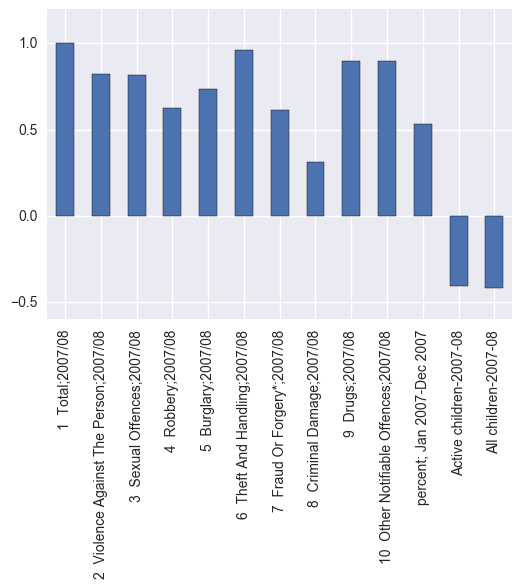

In [394]:
# Find correlations between total crime rate and all other columns
correlations = combined_07.corr().iloc[:,0]
# Filter correlations on >=0.25
significant_correlations = correlations[abs(correlations) >= 0.25]
significant_correlations.plot(kind="bar")
plt.show()

Unsurprisingly, the total crime rate correlates positively and significantly with all other crime rates columns.

The **total crime rate is positively and significantly correlated with economic inactivity in a borough** – this is the *percent* column (just over 0.5). This is worth exploring further; specifically, as we have data over several years, we can perform a temporal analysis on the data and see if this correlation holds over the years.

The total crime rate correlates negatively, and significantly, with the number of children, and with the number of active children in a borough. Under the hypothesis (checked below) that Active children is highly correlated with All children, we can consider Active children as a proxy for All children and therefore disregard it. The interesting result is thus that **total crime rates are negatively correlated with the absolute number of children in a borough**. This is worth exploring further: by dividing All children by Population we can find the percentage of children in a borough and explore the correlation of this percentage with crime rates.

In [395]:
# Find the correlation between Active children and All children
combined_07[["Active children-2007-08", "All children-2007-08"]].corr()

,Active children-2007-08,All children-2007-08
Active children-2007-08,1.00000,0.99279
All children-2007-08,0.99279,1.00000


### Percentage of Children vs Crime Rates

In [396]:
# Multiply Population;2007 by 10 to be on the same scale
combined_07["Population;2007"] = combined_07["Population;2007"] * 10
# Add a new column to the dataframe which contains the percentage of children in a borough
combined_07["children_percentage"] = combined_07["All children-2007-08"] / combined_07["Population;2007"]
# Display the first few rows
combined_07.head()

,1 Total;2007/08,2 Violence Against The Person;2007/08,3 Sexual Offences;2007/08,4 Robbery;2007/08,5 Burglary;2007/08,6 Theft And Handling;2007/08,7 Fraud Or Forgery*;2007/08,8 Criminal Damage;2007/08,9 Drugs;2007/08,10 Other Notifiable Offences;2007/08,...,percent; Jan 2007-Dec 2007,confidence; Jan 2007-Dec 2007,Active children-2007-08,All children-2007-08,Percent active-2007-08,Lower 95perc CI-2007-08,Upper 95perc CI-2007-08,Lower 99.8perc CI-2007-08,Upper 99.8perc CI-2007-08,children_percentage
Borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,114.569217,28.909764,1.590777,3.654187,9.518704,35.803487,7.140890,19.038215,7.639682,1.273511,...,27.7,3.7,23312,25329,92.0,91.7,92.4,91.5,92.5,0.252669
Barnet,77.037074,14.985494,0.725883,2.895254,11.998914,28.976133,3.101143,10.137084,3.341129,0.876040,...,27.4,3.5,32173,36657,87.8,87.4,88.1,87.2,88.3,0.228571
Bexley,71.430471,13.411913,0.558888,1.682461,9.652268,23.678482,3.181523,15.421792,3.173203,0.669941,...,22.7,3.4,30481,34416,88.6,88.2,88.9,88.0,89.1,0.320785
Brent,91.091533,19.044881,0.925061,6.757837,11.575941,29.390395,3.770500,10.089791,8.569370,0.967756,...,24.6,3.9,28462,33133,85.9,85.5,86.3,85.3,86.5,0.234837
Bromley,80.767996,15.878656,0.777325,2.543631,11.235830,28.092918,3.118068,15.153500,3.293590,0.674478,...,17.0,3.1,32812,36579,89.7,89.4,90.0,89.2,90.2,0.268071


In [397]:
# Correlate percentage of children and total crime rate
combined_07[["1  Total;2007/08","children_percentage"]].corr()

,1 Total;2007/08,children_percentage
1 Total;2007/08,1.000000,-0.487887
children_percentage,-0.487887,1.000000


Our hypothesis might be right: boroughs with a higher percentage of children tend to have lower crime rates, with a correlation of nearly -0.5.

## Limitations
* What are children?
* Surprising population figures in crime_rates and active_children

## Temporal Analysis: Crime Rates vs Economic Inactivity Over The Years

We'll now complement our analysis above with an exploration of the evolution of the relationship between crime rates and economic inactivity. For the sake of completeness, we'll re-import the datasets into two new dataframes and perform some data cleaning on them.

### Crime Rates

In [484]:
crime_rates = pd.read_csv("crime_rates.csv")
economic_inactivity = pd.read_csv("economic_inactivity.csv")

In [485]:
# Condense crime_rates to the borough level
grouped2 = crime_rates.groupby("Borough")

In [486]:
# Aggregate
grouped2 = grouped2.agg(numpy.mean)

In [487]:
# Reassign and reset index
crime_rates = grouped2.reset_index()

In [488]:
# Keep only the total crime rate
crime_rates = filter_dataframe(crime_rates, "Total", axis=1)
crime_rates.head()

,1 Total;2001/02,1 Total;2002/03,1 Total;2003/04,1 Total;2004/05,1 Total;2005/06,1 Total;2006/07,1 Total;2007/08,1 Total;2008/09,1 Total;2009/10,1 Total;2010/11,1 Total;2011/12,1 Total;2012/13,1 Total;2013/14,1 Total;2014/15
0,124.552709,120.743695,126.509215,126.814064,122.634121,127.326799,114.569217,111.590269,109.790769,103.903268,97.750828,86.772450,78.936637,79.095925
1,87.639095,89.505071,95.534114,100.836538,94.358902,86.080885,77.037074,74.423128,72.521561,71.621730,72.026024,68.117062,60.432458,61.644797
2,92.521950,84.225738,86.118580,81.598870,81.843773,76.104955,71.430471,69.981318,66.795042,59.826213,51.133746,51.872031,49.137489,50.710123
3,109.681489,108.362658,109.245094,111.648043,107.234073,103.402548,91.091533,85.765403,90.485149,91.363634,97.368075,83.628418,74.071518,75.939811
4,88.354795,93.597609,93.795748,95.856309,93.792533,90.853619,80.767996,83.244015,76.800375,69.399488,67.936569,63.194889,59.353991,61.940548


In [489]:
# Drop the extra years: 2001, 2002, 2003, and 2014
crime_rates.columns
crime_rates.drop(["1  Total;2001/02","1  Total;2002/03","1  Total;2003/04","1  Total;2014/15"], axis=1, inplace=True)

In [490]:
# Add the Borough
crime_rates["Borough"] = data["crime_rates"]["Borough"]

In [491]:
# Drop the row for London (last row)
crime_rates = crime_rates.iloc[:crime_rates.shape[0]-1,:]

### Economic Inactivity

In [492]:
# Keep only the columns which contain the percentage of inactive people
economic_inactivity_filtered2 = filter_dataframe(economic_inactivity, "percent", axis=1)

In [493]:
# Drop the row for London (first row) and areas outside of London (from row 34)
economic_inactivity_filtered2 = economic_inactivity_filtered2.iloc[1:33,:]

In [494]:
# Add the borough
economic_inactivity_filtered2["Borough"] = economic_inactivity["Area"]

In [511]:
# Reassign
economic_inactivity = economic_inactivity_filtered2

In [519]:
# Convert all columns to numeric
ei_cols = list(economic_inactivity.columns)
ei_cols.pop()
for col in ei_cols:
    economic_inactivity[col] = pd.to_numeric(economic_inactivity[col], errors="coerce")

### Plotting

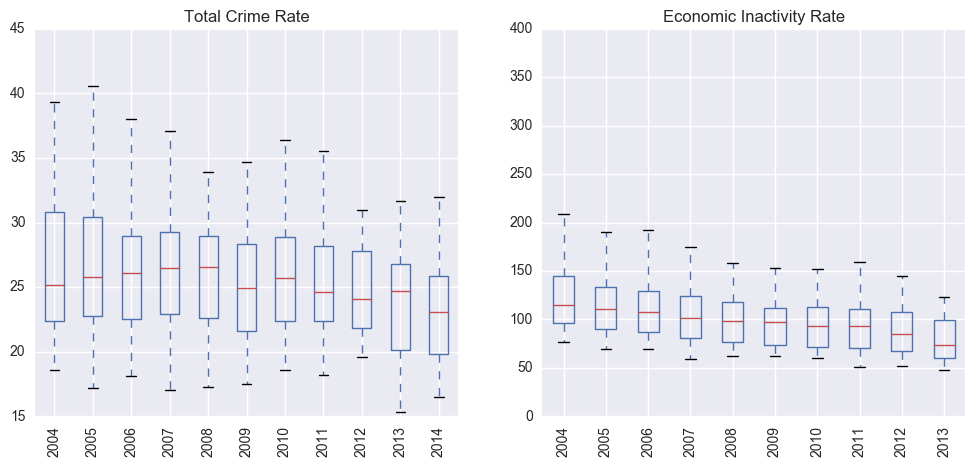

In [537]:
# Create a figure instance
fig = plt.figure(figsize=(12,5))
# Create two horizontally distributed axes
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

labels=list(range(2004,2015))

# Create a boxplot of economic inactivity over the years
economic_inactivity.plot(kind="box", ax=ax1)
ax1.set_xticklabels(labels=labels, rotation=90)
ax1.set_title("Total Crime Rate")

# Same for crime_rates
crime_rates.plot(kind="box", ax=ax2)
ax2.set_xticklabels(labels=labels, rotation=90)
ax2.set_title("Economic Inactivity Rate")

plt.show()

In [508]:
economic_inactivity

,percent; Jan 2004-Dec 2004,percent; Jan 2005-Dec 2005,percent; Jan 2006-Dec 2006,percent; Jan 2007-Dec 2007,percent; Jan 2008-Dec 2008,percent; Jan 2009-Dec 2009,percent; Jan 2010-Dec 2010,percent; Jan 2011-Dec 2011,percent; Jan 2012-Dec 2012,percent; Jan 2013-Dec 2013,percent; Oct 2013-Sep 2014,Borough
1,31.8,31.0,31.3,27.7,29.3,28.9,27.6,28.6,27.7,25.3,28.5,Barking and Dagenham
2,24.7,25.6,26.5,27.4,27.2,28.0,24.9,24.7,25.9,23.4,25.4,Barnet
3,21.0,20.5,20.5,22.7,22.4,24.3,22.9,23.2,21.2,20.2,21.2,Bexley
4,30.1,28.4,29.2,24.6,24.0,24.4,30.2,30.8,25.2,24.8,26.8,Brent
5,19.4,17.2,20.5,17.0,19.2,20.2,23.0,21.9,21.1,19.9,19.4,Bromley
6,27.0,30.4,28.2,28.3,28.2,28.6,26.3,32.9,29.3,31.7,27.6,Camden
7,22.1,20.7,22.6,21.9,21.6,20.4,22.2,24.6,19.6,19.5,19.1,Croydon
8,25.8,27.1,24.6,27.3,26.6,26.3,25.1,24.1,24.0,25.7,27.5,Ealing
9,27.1,25.9,25.7,30.5,27.1,32.1,30.8,26.2,28.2,27.2,25.3,Enfield
10,26.6,25.6,26.8,25.2,29.1,29.2,26.1,23.9,22.3,27.7,27.3,Greenwich
